# <div style="text-align:center; border-radius:15px; padding:15px; margin:0; font-size:140%; font-family:Arial, sans-serif; background-color:#7851A9; color:#ffffff; overflow:hidden; box-shadow:0 3px 6px rgba(0, 0, 0, 0.3);"><b> 📝 Powerco 기업의 고객 이탈 예측 </b></div>

![](https://battery-power.eu/wp-content/uploads/2023/03/PowerCo_Logo_CO_RGB.png)



Powerco는 유럽 시장에서 중소기업(SME) 및 주거 고객에게 **전기와 가스를 공급하는 에너지 회사**입니다.



# 🎯 분석 목적

1. **고객 이탈(churn) 가능성이 높은 중소기업 고객(SME)** 을 조기에 식별하는 것이 목표입니다.

2. 특히 유럽 에너지 시장의 **전력 자유화(liberalization)** 로 인해 고객 이탈이 늘고 있어 대응이 필요합니다.




# 📊 분석 과제
주어진 고객 데이터를 바탕으로

**이탈 확률(Churn Probability)** 을 예측하고

예측 결과를 바탕으로 **마케팅 전략 수립에 도움이 되는 인사이트를 제공**하는 것이 과제입니다.

(예 : 고객 유지 전략으로 할인 제공)



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-industry/ml_case_training_data.csv
/kaggle/input/energy-industry/ml_case_training_hist_data.csv
/kaggle/input/energy-industry/ml_case_training_output.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.impute import SimpleImputer
import datetime
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

import matplotlib.font_manager as fm
import os

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-darkgrid')


font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)


# Table of Contents

**1. EDA**

    [1.1] 🔍 결측치, unique 비율 확인  
    [1.2] 📊 범주형 데이터 분포 확인  
    [1.3] 📈 수치형 데이터 분포 확인  
    [1.4] 🧭 타겟 값 분포 확인  
    [1.5] 🧮 수치형 데이터 상관계수 확인  
    [1.6] 🎯 타겟의 상관계수 확인  



**2. Data Preprocessing (전처리)**


| 순서 | 처리 내용              | 대상 컬럼                                                       | 방식                                        |
| -- | ------------------ | ----------------------------------------------------------- | ----------------------------------------- |
| 1  | 결측치 많은 상위 7개 컬럼 제거 | `missing_counts.index[:7]`                                  | `drop()`                                  |
| 2  | 결측치 → 새로운 범주로 대체   | `channel_sales`                                             | `'new category'`로 `fillna()`              |
| 3  | 결측치 보간             | `date_modif_prod`, `date_renewal`, `date_end`               | `bfill` (뒤 값으로 채움)                        |
| 4  | 정수형으로 변환           | 수치형 중 일부 (제외 리스트 제외)                                        | `pd.to_numeric` → `Int64`                 |
| 5  | 결측치 → 최빈값 대체       | `origin_up`                                                 | `SimpleImputer(strategy='most_frequent')` |
| 6  | 결측치 → 최빈값 대체       | 나머지 수치형 컬럼들                                                 | `SimpleImputer(strategy='most_frequent')` |
| 7  | 데이터 병합             | `train_data` + `train_out` (on='id')                        | `pd.merge()`                              |
| 8  | 날짜형 변환             | `date_activ`, `date_end`, `date_modif_prod`, `date_renewal` | `pd.to_datetime()`                        |


**3. Feature Engineering**

    [3.1] ✅ 전처리 후 데이터 분포 확인
    [3.2] ✅ 전처리 후 타겟의 상관계수 확인
    
**4. Modeling & Evaluation**

**5. 성능 개선**

**6. 인사이트 도출**

# <span style="color:#ffffff; font-size: 1%;">[1] 💡 Exploratory Data Analysis (EDA)</span>
### <span style="color:#ffffff; font-size: 1%;">EDA</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[1] 📈💡EDA</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://www.juniper.net/content/dam/www/assets/images/us/en/customers/case-studies/logos/2022/powerco-logo-2.png/jcr:content/renditions/cq5dam.web.1280.1280.png'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

In [3]:
train_data=pd.read_csv('../input/energy-industry/ml_case_training_data.csv')
train_out=pd.read_csv('../input/energy-industry/ml_case_training_output.csv')
train_hist=pd.read_csv('../input/energy-industry/ml_case_training_hist_data.csv')

In [4]:
# train=pd.merge(train_data, train_out, on=['id'])

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.1] ✅ 결측치, unique 비율 확인</span></b>

In [5]:

# 한글 폰트 설치
!apt-get update -qq
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

# 폰트 캐시 갱신 후 NanumGothic 폰트 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path, size=12)

# Matplotlib에 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)



The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 70 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (46.0 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 128663 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/cMap: caching, new cache contents: 0 fonts, 0 di

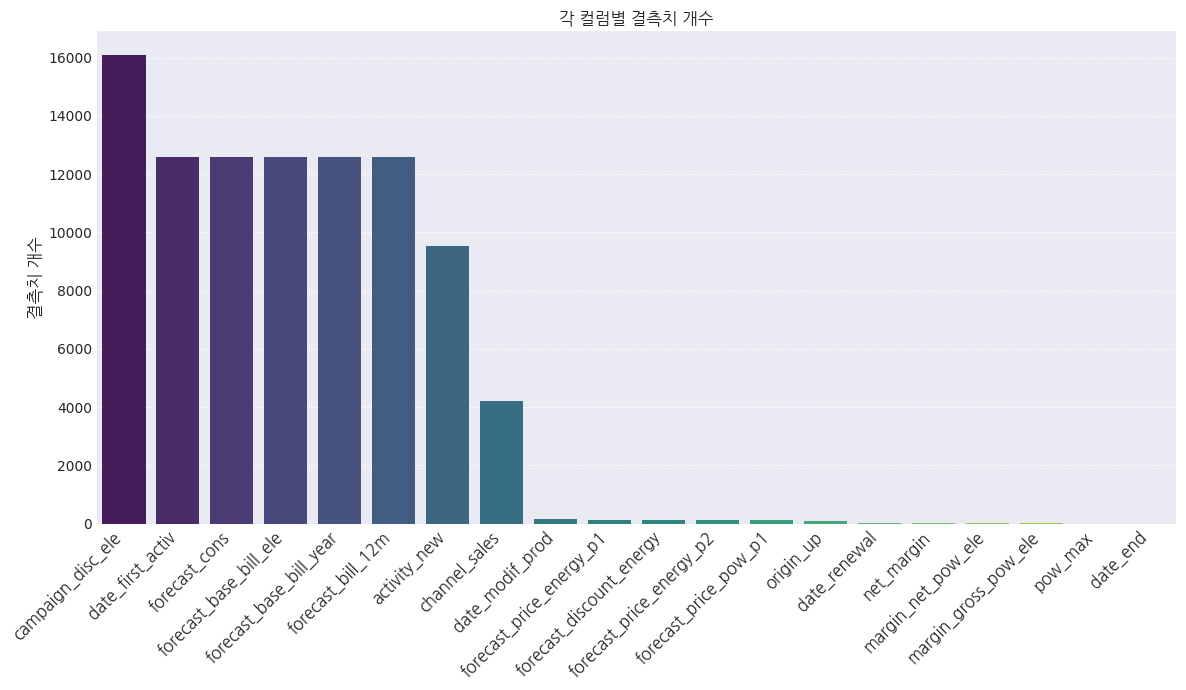

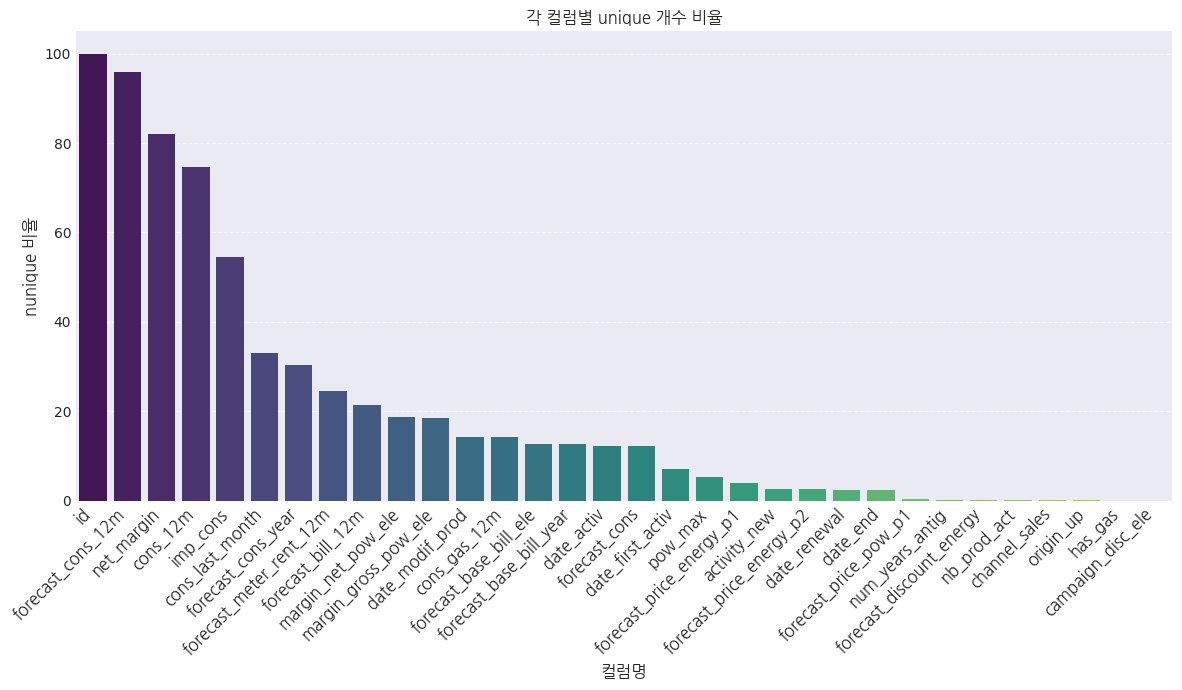

In [6]:
train_data.isnull().sum().sort_values(ascending=False)
missing_counts = train_data.isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)



# 결측치 시각화
if not missing_counts.empty and missing_counts.sum() > 0:
    plt.figure(figsize=(12, 7))
    sns.barplot(x=missing_counts.index, y=missing_counts.values, palette='viridis')
    
    # 한글 폰트 명시적으로 지정
    plt.title('각 컬럼별 결측치 개수', fontproperties=font)
    # plt.xlabel('컬럼명', fontproperties=font)
    plt.ylabel('결측치 개수', fontproperties=font)
    plt.xticks(rotation=45, ha='right', fontproperties=font)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()


# nunique 시각화
train_nunique = (train_data.nunique() / len(train_data) * 100).sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=train_nunique.index, y=train_nunique, palette='viridis')

# 한글 폰트 명시적으로 지정
plt.title('각 컬럼별 unique 개수 비율', fontproperties=font)
plt.xlabel('컬럼명', fontproperties=font)
plt.ylabel('nunique 비율', fontproperties=font)
plt.xticks(rotation=45, ha='right', fontproperties=font)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

In [7]:
# data.shape, hist_data.shape,output.shape

missing_values = pd.DataFrame({'컬럼': train_data.columns,
                              '결측치 개수': train_data.isnull().sum().values,
                              '[%] 결측치 비율': ((train_data.isnull().sum().values)/len(train_data)*100)})

# missing_values_hist_data = pd.DataFrame({'Feature': hist_data.columns,
#                              '[TEST] No.of Missing Values': hist_data.isnull().sum().values,
#                              '[TEST] % of Missing Values': ((hist_data.isnull().sum().values)/len(hist_data)*100)})

unique_values = pd.DataFrame({'컬럼': train_data.columns,
                              'Unique 개수': train_data.nunique().values,
                              '[%] Unique 비율': (train_data.nunique().values/len(train_data)*100)
                             })

feature_types = pd.DataFrame({'컬럼': train_data.columns,
                              'DataType': train_data.dtypes})

merged_df = pd.merge(missing_values, unique_values, on='컬럼', how='left')
# merged_df = pd.merge(merged_df, unique_values, on='Feature', how='left')
merged_df = pd.merge(merged_df, feature_types, on='컬럼', how='left')
merged_df.sort_values(by = 'DataType', ascending = False, inplace = True)

merged_df.style.background_gradient(cmap='cubehelix')

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.2] ✅ 범주형 데이터 분포 확인</span></b>

In [8]:
plt_train=pd.merge(train_data, train_out, on=['id'])

cat_df = plt_train.select_dtypes(include = 'O').copy()
num_df = plt_train.select_dtypes(exclude = 'O').copy()

cat_df['churn'] = plt_train['churn']

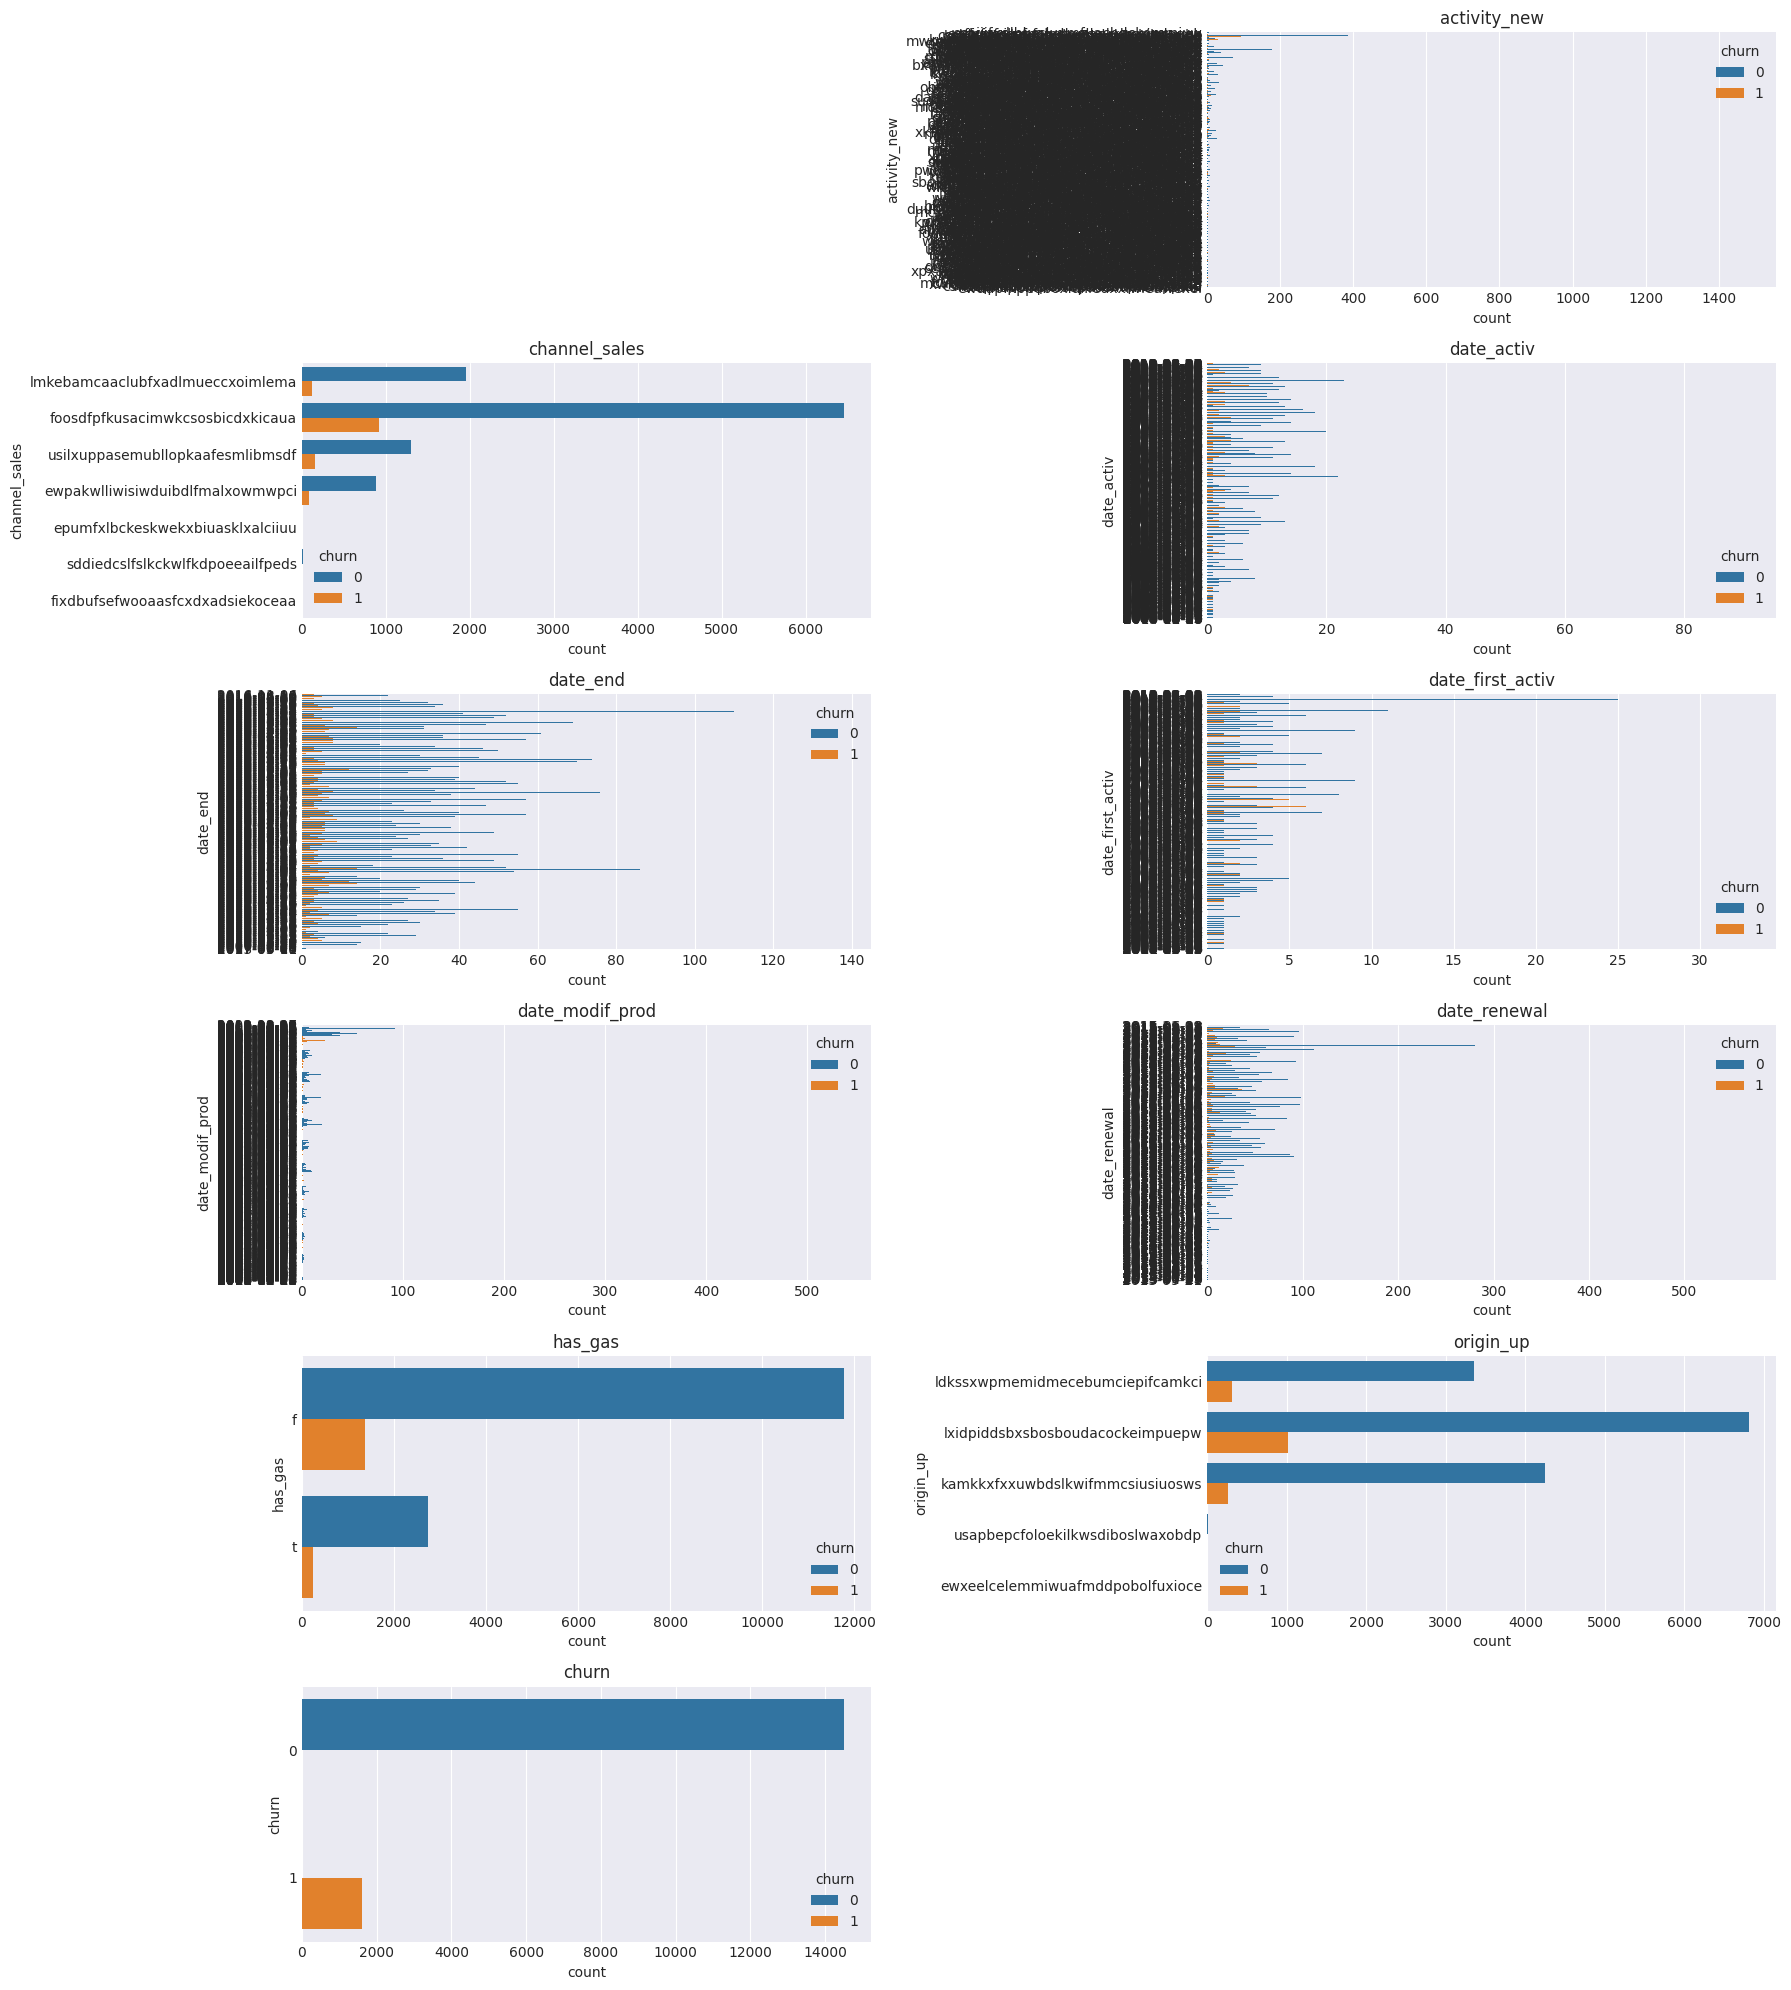

In [9]:
# cat_df의 값 분포 확인

fig = plt.figure(figsize=(18, 20))
for index, col in enumerate(cat_df.columns):
    if cat_df[col].nunique() < 16000:  # 범주 수가 적을 때만 시각화
        plt.subplot(6, 2, index + 1)
        sns.countplot(y=col, data=cat_df, hue='churn')
        plt.title(col)
        # plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.3] ✅ 수치형 데이터 분포 확인</span></b>

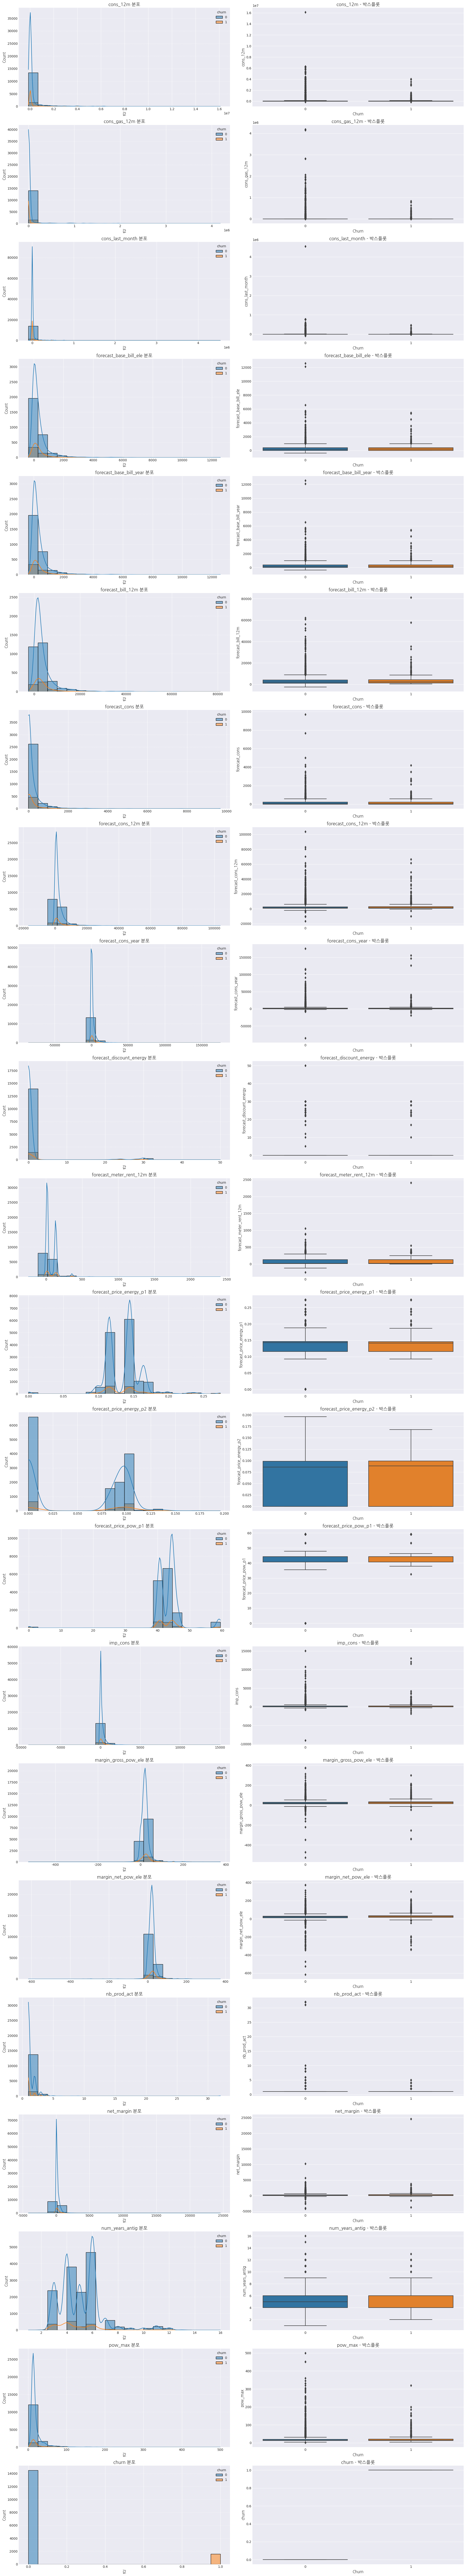

In [10]:

valid_cols = [col for col in num_df.columns[1:] if num_df[col].dropna().nunique() > 1]
n_rows = len(valid_cols)

fig, axes = plt.subplots(n_rows, 2, figsize=(20, 5 * n_rows))

for i, col in enumerate(valid_cols):
    # 1. 히스토그램 (왼쪽)
    sns.histplot(data=num_df, x=col, hue='churn', bins=20, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} 분포', fontproperties=font_prop, fontsize=14)
    axes[i, 0].set_xlabel('값', fontproperties=font_prop, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontproperties=font_prop, fontsize=12)
    axes[i, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # 2. 박스플롯 (오른쪽)
    sns.boxplot(data=num_df, x='churn', y=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - 박스플롯', fontproperties=font_prop, fontsize=14)
    axes[i, 1].set_xlabel('Churn', fontproperties=font_prop)
    axes[i, 1].set_ylabel(col, fontproperties=font_prop)

plt.tight_layout()
plt.show() 

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.4] ✅ 타켓 값 분포 확인</span></b>

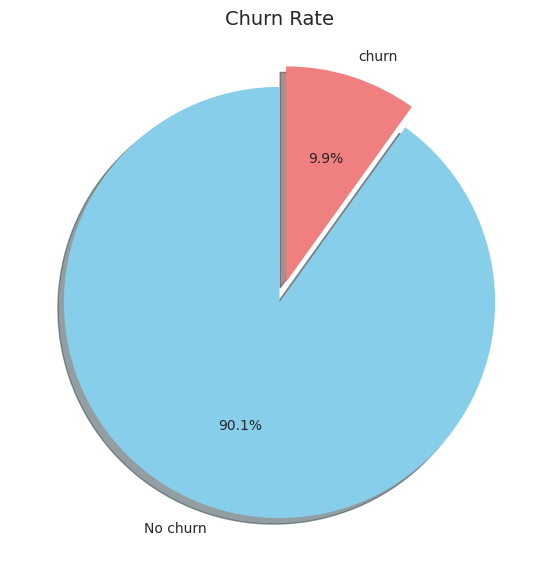

In [11]:
# 한글 폰트 설치
# !apt-get update -qq
# !apt-get install -y fonts-nanum
# !fc-cache -fv
# !rm -rf ~/.cache/matplotlib

# # 폰트 캐시 갱신 후 NanumGothic 폰트 경로 확인
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path, size=12)

# Matplotlib에 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
plt.figure(figsize=(7, 7)) # 그래프 크기 설정


churn_counts = num_df['churn'].value_counts()

churn_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    explode=[0, 0.1],  # 두 번째 조각(Churn)을 띄움
    labels=['No churn', 'churn'],
    shadow=True,
    ylabel=''
)
plt.title('Churn Rate', fontsize=14)
plt.show()

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.5] ✅ 수치형 데이터 상관계수 확인</span></b>

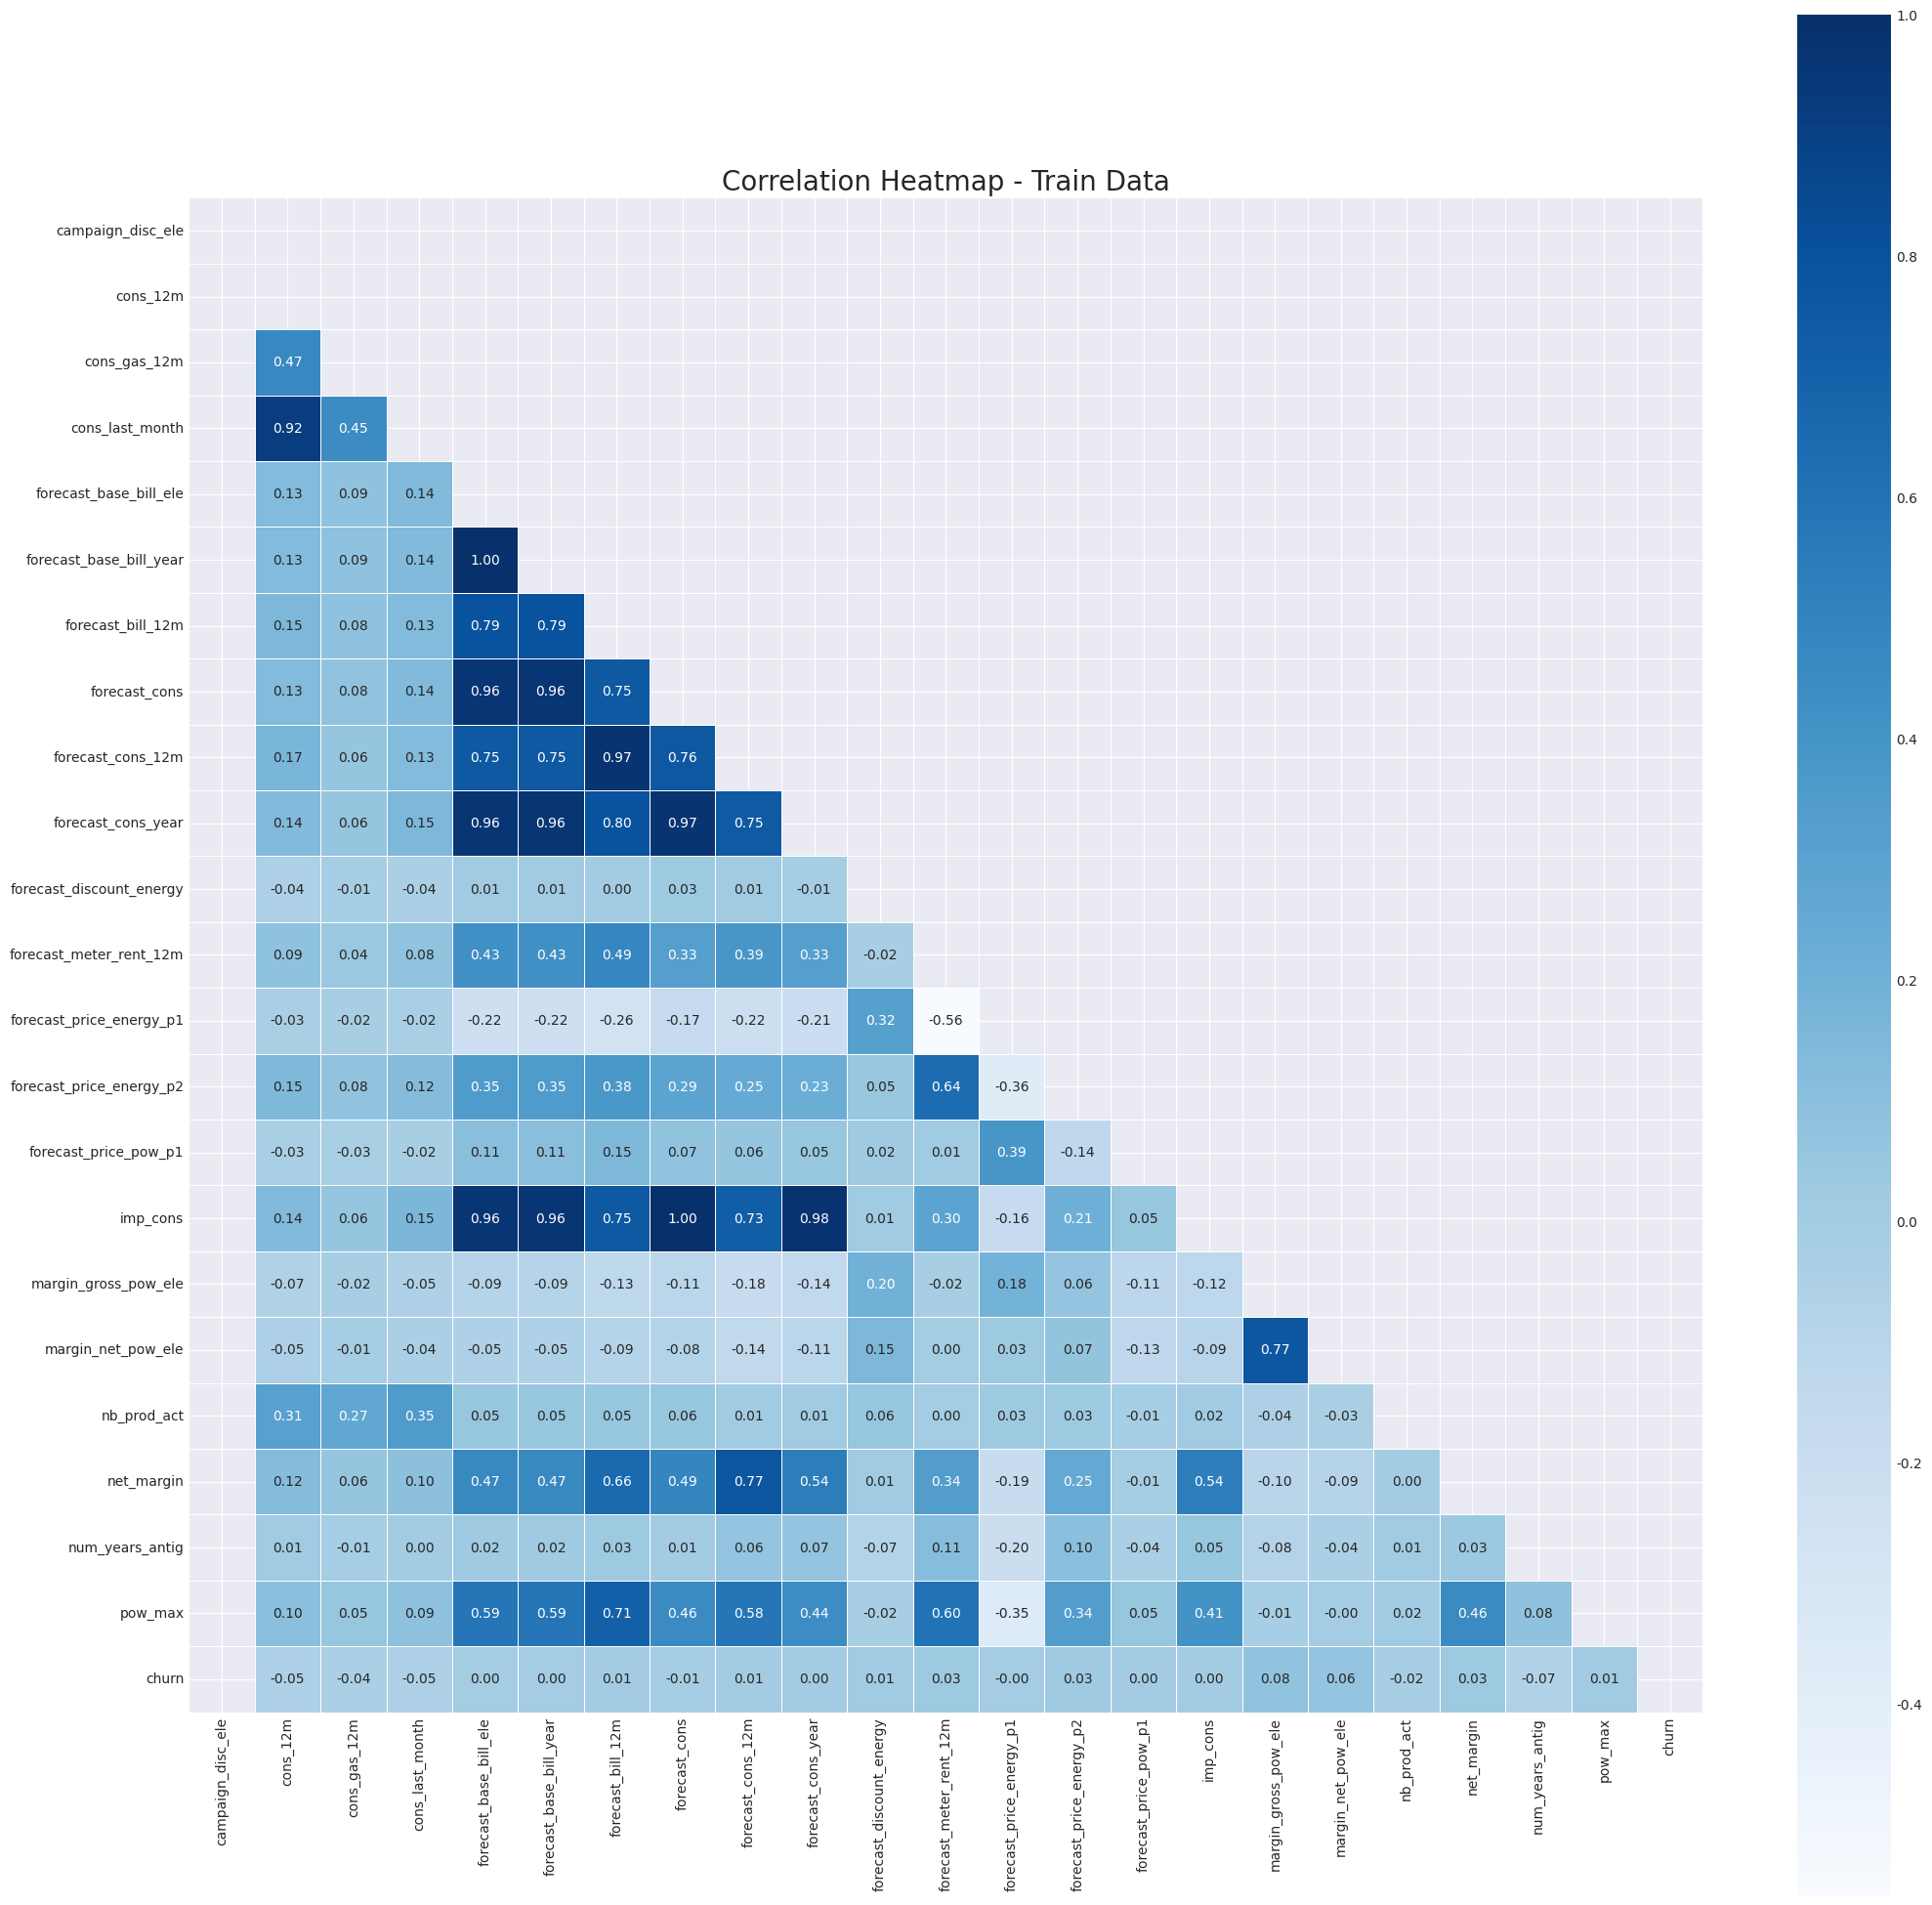

In [12]:
corr = num_df.corr()
mask = np.triu(np.ones_like(corr, dtype= bool))

plt.figure(figsize = (25,25))
sns.heatmap(num_df.corr(),mask= mask, annot = True, fmt ='.2f', linewidth = 0.5, cmap = 'Blues', square = True)

plt.title('Correlation Heatmap - Train Data',fontsize=20)

plt.show()

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [1.6] ✅ 타켓의 상관계수 확인</span></b>

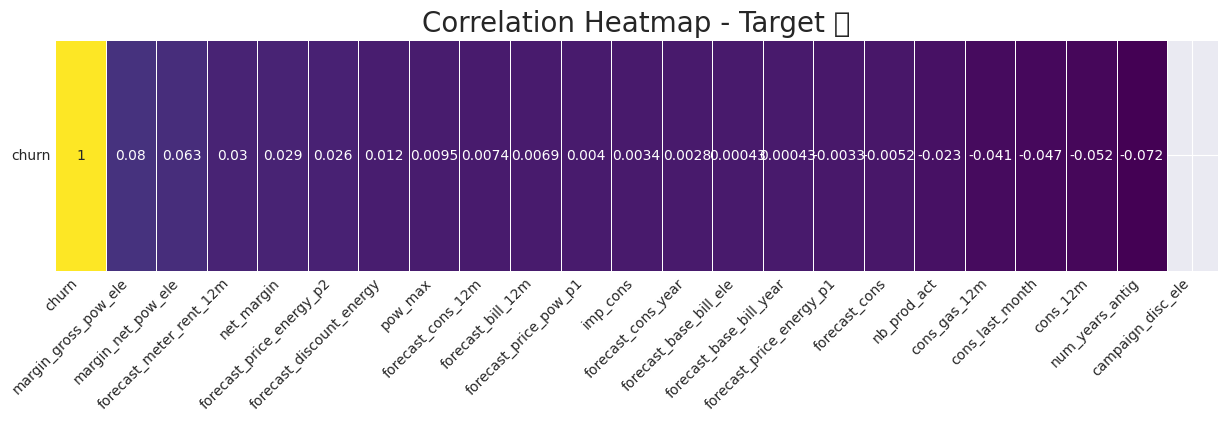

In [13]:
# target 의 corr값

corr_df = num_df.corr()[['churn']].sort_values(by = 'churn', ascending = False).T
# corr_train

# Generate horizontal heatmap without color bar
plt.figure(figsize=(15, 3))  # Adjusted for a horizontal layout
ax_train = sns.heatmap(corr_df, cmap='viridis', annot=True, 
                      square=False, linewidths=0.5,
                      cbar=False)  # **Removed color bar**



plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.title('Correlation Heatmap - Target 값',fontsize=20)
plt.yticks(rotation=0)  # Keep y-labels horizontal

# Show plot
plt.show()

# <span style="color:#ffffff; font-size: 1%;">[2] 💡Data Preprocessing (전처리)</span>
### <span style="color:#ffffff; font-size: 1%;">EDA</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[2] 📈💡Data Preprocessing (전처리)</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://www.juniper.net/content/dam/www/assets/images/us/en/customers/case-studies/logos/2022/powerco-logo-2.png/jcr:content/renditions/cq5dam.web.1280.1280.png'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

In [14]:
# 결측치가 많은 상위 7개 컬럼을 제거
train_data.drop(missing_counts.index[:7], axis=1, inplace=True)

# 'channel_sales' 컬럼의 결측값을 'new category'라는 새로운 범주로 대체
train_data['channel_sales'] = train_data['channel_sales'].fillna('new category')


# 특정 컬럼들만 bfill 결측치 처리
train_data[['date_modif_prod','date_renewal','date_end']]=train_data[['date_modif_prod','date_renewal',
                                                            'date_end']].fillna(method='bfill')

# 정수형으로 변환 가능한 수치형 컬럼만 골라서 정수형(Int64)으로 변환
for col in [x for x in missing_counts.index[8:] if x not in ['date_modif_prod','date_renewal','date_end','origin_up',
                                                        'forecast_price_energy_p1','forecast_price_energy_p2']]:
    train_data[col] = np.round(pd.to_numeric(train_data[col], errors='coerce')).astype('Int64')

# 결측치(NaN)를 최빈값(most frequent value) 으로
origin_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_data[['origin_up']]=origin_imp.fit_transform(train_data[['origin_up']])


imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_data[[x for x in missing_counts.index[8:] if x not in ['date_modif_prod',
                                                        'date_renewal','origin_up','date_end']]]=imp_freq.fit_transform(
    train_data[[x for x in missing_counts.index[8:] if x not in ['date_modif_prod',
                                                        'date_renewal','origin_up','date_end']]])

In [15]:
# 데이터 병합 
train=pd.merge(train_data, train_out, on=['id'])

In [16]:
# 날짜형 type으로 변환
for col in ['date_activ','date_end','date_modif_prod','date_renewal']:
    train[col]=pd.to_datetime(train_data[col])

# <span style="color:#ffffff; font-size: 1%;">[3] 💡Feature Engineering</span>
### <span style="color:#ffffff; font-size: 1%;">EDA</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[3] 📈💡Feature Engineering</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://www.juniper.net/content/dam/www/assets/images/us/en/customers/case-studies/logos/2022/powerco-logo-2.png/jcr:content/renditions/cq5dam.web.1280.1280.png'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

In [17]:
# 1. 계약 기간 (일 단위) 계산
train['contract_tenure'] = train['date_end'] - train['date_activ']
train['contract_tenure'] = train['contract_tenure'].apply(lambda x: x.days)

# 2. 계약 기간을 연 단위로 변환 (365일 기준으로 반올림)
train['contract_tenure_year'] = train['contract_tenure'].apply(lambda x: int(np.round(x / 365)))

# 3. 매달 평균 소비 대비 직전 월 소비량 차이 계산 (소비 패턴 변화)
train['bill_dev'] = (train['cons_12m'] / 12) - train['cons_last_month']


# 4. 무한값 처리 함수 정의
def handleInf(x):
    if x == float('-inf') or x == float('inf'):
        return 0

# 5. 예측된 소비량 / 실제 소비량 비율 → 소비 예측 정확도 지표
train['cons_pattern'] = train['forecast_cons_12m'] / train['cons_12m']
# 무한값을 0으로 대체
train.cons_pattern = train.cons_pattern.apply(handleInf)

# 6. 가격 관련 컬럼의 결측치를 평균으로 채움
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
train_hist[['price_p1_var','price_p2_var','price_p3_var',
            'price_p1_fix','price_p2_fix','price_p3_fix']] = imp_mean.fit_transform(
    train_hist[['price_p1_var','price_p2_var','price_p3_var',
                'price_p1_fix','price_p2_fix','price_p3_fix']])

# 7. 고정 요금 + 변동 요금 합산 → 실제 요금 수준 계산
train_hist['price_p1'] = train_hist['price_p1_var'] + train_hist['price_p1_fix']
train_hist['price_p2'] = train_hist['price_p2_var'] + train_hist['price_p2_fix']
train_hist['price_p3'] = train_hist['price_p3_var'] + train_hist['price_p3_fix']

# 8. 요금제 간 차이 계산 (가격 차이 피처)
train_hist['pp12'] = train_hist['price_p2'] - train_hist['price_p1']
train_hist['pp23'] = train_hist['price_p3'] - train_hist['price_p2']
train_hist['pp13'] = train_hist['price_p3'] - train_hist['price_p1']

# 9. 원래의 고정/변동 요금 컬럼 제거 (불필요해진 중간 컬럼 제거)
train_hist.drop(['price_date','price_p1_var','price_p2_var','price_p3_var',
                 'price_p1_fix','price_p2_fix','price_p3_fix'], inplace=True, axis=1)

In [18]:
# train_hist 전처리 해서 데이터 병합 
train=pd.merge(train_hist, train, on=['id'])

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 1. 결측치 처리
train.fillna(0, inplace=True)

# 2. 타겟값
y = train["churn"]

# 3. 사용하지 않을 컬럼 제외
X = train.drop(labels=["id", "date_activ", "date_end", "date_modif_prod", "date_renewal", "churn"], axis=1)

# 4. has_gas를 숫자형으로 변환
X['has_gas'] = X['has_gas'].apply(lambda x: 0 if x == 'f' else 1)

# 5. OneHot 인코딩할 컬럼 인덱스 (6, 24번: 꼭 실제 데이터에서 맞는지 확인!)
cat_features = [6, 24]
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), cat_features)],
    remainder='passthrough'
)
X_trans = ct.fit_transform(X)

# 6. feature 이름 추출
ohe_feature_names = ct.named_transformers_['encoder'].get_feature_names_out(X.columns[cat_features])
other_cols = [col for i, col in enumerate(X.columns) if i not in cat_features]
feature_names = list(ohe_feature_names) + other_cols

print("최종 Feature Names 개수:", len(feature_names))
print(feature_names)

최종 Feature Names 개수: 41
['channel_sales_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci', 'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa', 'channel_sales_foosdfpfkusacimwkcsosbicdxkicaua', 'channel_sales_lmkebamcaaclubfxadlmueccxoimlema', 'channel_sales_new category', 'channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_sales_usilxuppasemubllopkaafesmlibmsdf', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce', 'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws', 'origin_up_ldkssxwpmemidmecebumciepifcamkci', 'origin_up_lxidpiddsbxsbosboudacockeimpuepw', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'price_p1', 'price_p2', 'price_p3', 'pp12', 'pp23', 'pp13', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_a

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.1] ✅ 전처리 후 데이터 분포 확인</span></b>

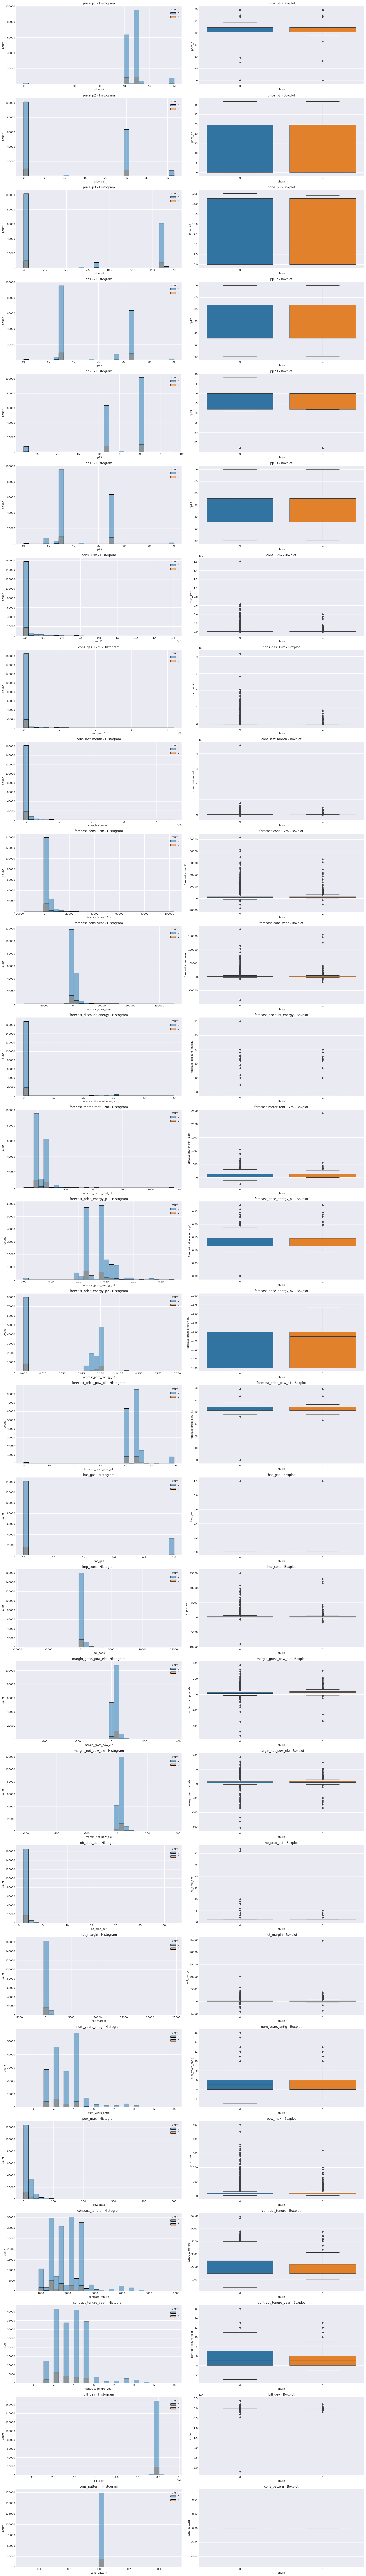

In [20]:
# 1. X와 y 결합
plot_df = X.copy()
plot_df['churn'] = y

# 2. 수치형 컬럼만 추출
num_cols = plot_df.select_dtypes(include=['int64', 'float64']).columns.drop('churn', errors='ignore')


fig, axes = plt.subplots(len(num_cols), 2, figsize=(20, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    # 1. 히스토그램
    sns.histplot(data=plot_df, x=col, hue='churn', bins=30, kde=False, ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} - Histogram")

    # 2. 박스플롯
    sns.boxplot(data=plot_df, x='churn', y=col, ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} - Boxplot")

plt.tight_layout()
plt.show()


<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.2] ✅ 전처리 후 데이터 간 상관계수 확인</span></b>

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   price_p1                  193002 non-null  float64
 1   price_p2                  193002 non-null  float64
 2   price_p3                  193002 non-null  float64
 3   pp12                      193002 non-null  float64
 4   pp23                      193002 non-null  float64
 5   pp13                      193002 non-null  float64
 6   channel_sales             193002 non-null  object 
 7   cons_12m                  193002 non-null  int64  
 8   cons_gas_12m              193002 non-null  int64  
 9   cons_last_month           193002 non-null  int64  
 10  forecast_cons_12m         193002 non-null  float64
 11  forecast_cons_year        193002 non-null  int64  
 12  forecast_discount_energy  193002 non-null  float64
 13  forecast_meter_rent_12m   193002 non-null  f

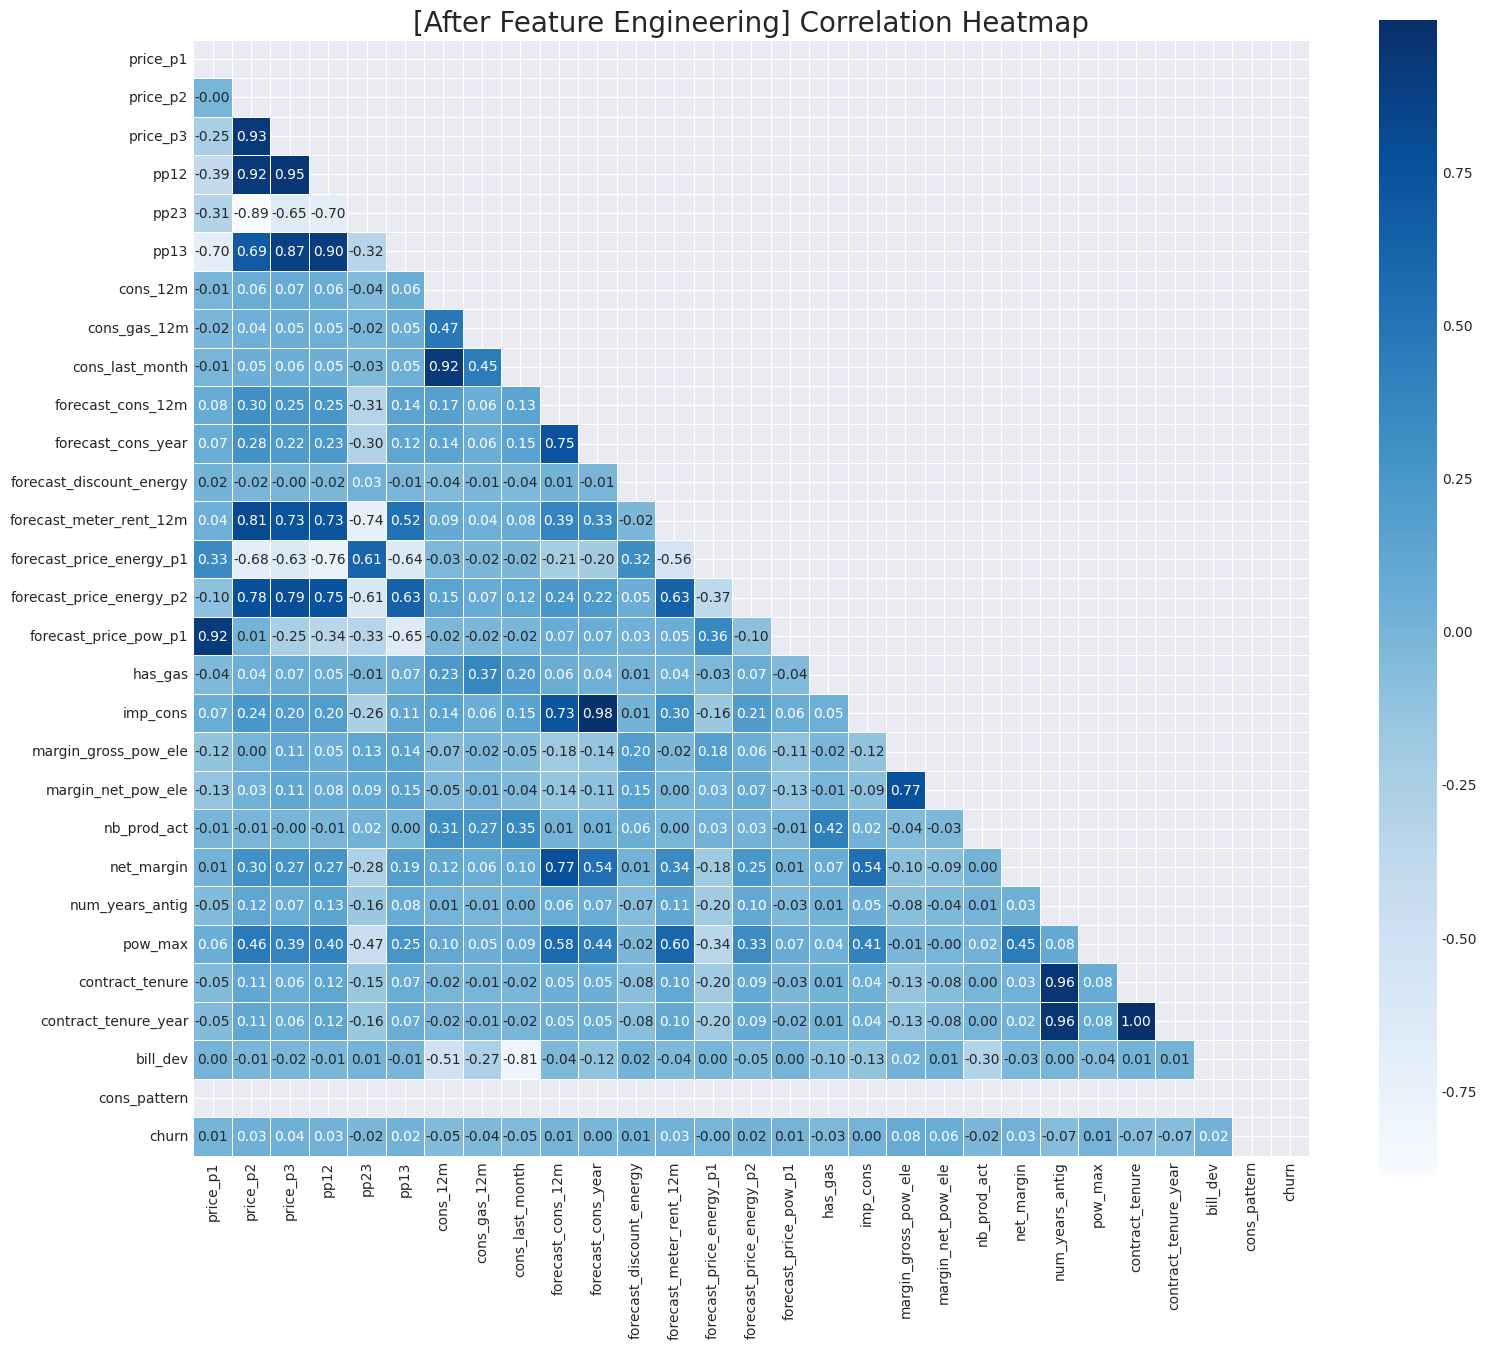

In [22]:
# 전처리 결과 값 corr 확인

# 숫자형 컬럼만 선택해서 상관관계 계산
corr = plot_df.select_dtypes(include=np.number).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18, 15))
sns.heatmap(corr,mask= mask, annot = True, fmt ='.2f', linewidth = 0.5, cmap = 'Blues', square = True)
plt.title('[After Feature Engineering] Correlation Heatmap',fontsize=20)
plt.show()

<b><span style="color: #FFFFFF; background-color: #7851A9; padding: 20px; font-size: 18px; border-left: 8px solid #C9A0DC"> [3.2] ✅ 전처리 후 타겟의 상관계수 확인</span></b>

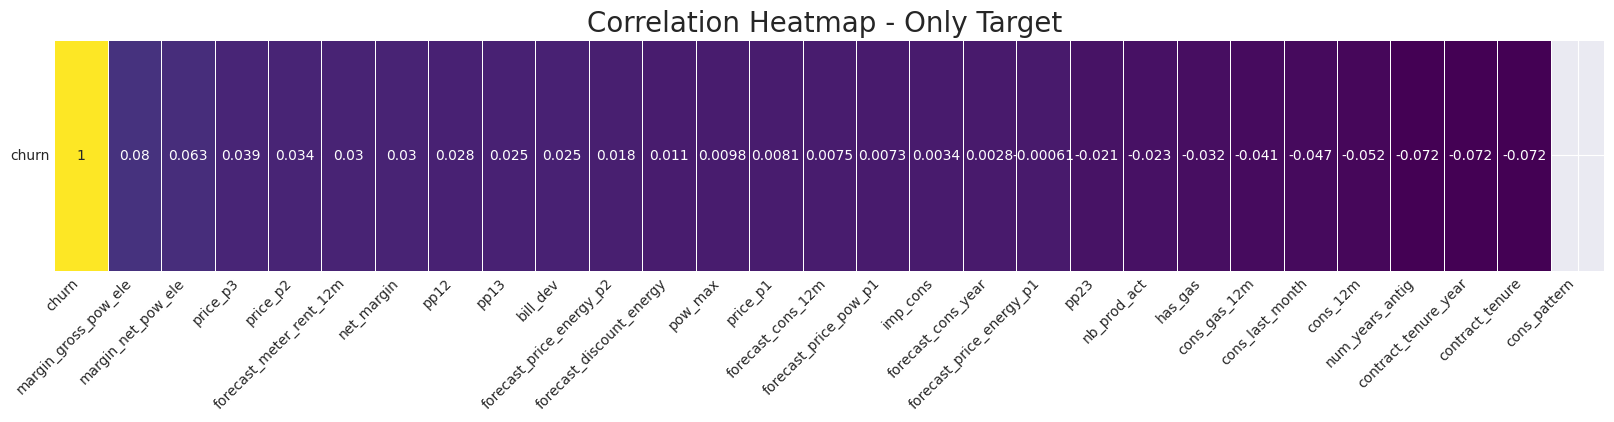

In [23]:
# target 의 corr값

corr_df = plot_df.select_dtypes(include=np.number).corr()[['churn']].sort_values(by = 'churn', ascending = False).T


# Generate horizontal heatmap without color bar
plt.figure(figsize=(20, 3))  # Adjusted for a horizontal layout
ax_train = sns.heatmap(corr_df, cmap='viridis', annot=True, 
                      square=False, linewidths=0.5,
                      cbar=False)  # **Removed color bar**



plt.xticks(rotation=45, ha="right")  # Rotate labels for readability
plt.title('Correlation Heatmap - Only Target ',fontsize=20)
plt.yticks(rotation=0)  # Keep y-labels horizontal

# Show plot
plt.show()

# <span style="color:#ffffff; font-size: 1%;">[4] 💡 Modeling & Evaluation</span>
### <span style="color:#ffffff; font-size: 1%;">Modeling & Evaluation</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[4] 📈💡Modeling & Evaluation</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://www.juniper.net/content/dam/www/assets/images/us/en/customers/case-studies/logos/2022/powerco-logo-2.png/jcr:content/renditions/cq5dam.web.1280.1280.png'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

In [24]:
# ColumnTransformer로 인코딩 후 X를 넘파이 배열로 변환 (DataFrame → NumPy 배열로 변환 (sklearn 요구 형식))
X = np.array(ct.fit_transform(X))

#  훈련/검증 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=18)

# 트리 기반의 강력한 분류기
model = xgb.XGBClassifier(
    learning_rate=0.1,      # 학습률 (학습 속도 조절)
    max_depth=6,            # 각 트리의 최대 깊이 (과적합 방지에 영향)
    n_estimators=500,       # 트리 개수 (전체 모델 복잡도 결정)
    n_jobs=-1,              # 모든 CPU 코어 사용
    use_label_encoder=False # 경고 메시지 방지용 (XGBoost v1.3 이상에서는 True로 두면 경고 발생)
)

# XGBoost 모델 학습
result = model.fit(X_train,y_train)

In [25]:
def evaluate(model_, X_test_, y_test_):
    # 1. 테스트 데이터에 대해 모델 예측 수행
    prediction_test_ = model_.predict(X_test_)
    
    # 2. 정확도(Accuracy), 정밀도(Precision), 재현율(Recall) 계산
    results = pd.DataFrame({
        "Accuracy": [metrics.accuracy_score(y_test_, prediction_test_)],
        "Precision": [metrics.precision_score(y_test_, prediction_test_)],
        "Recall": [metrics.recall_score(y_test_, prediction_test_)]
    })
    
    # 3. 결과를 데이터프레임 형태로 반환
    return results


evaluate(model, X_test, y_test)

Accuracy  Precision    Recall
0  0.981928   0.999473  0.813385

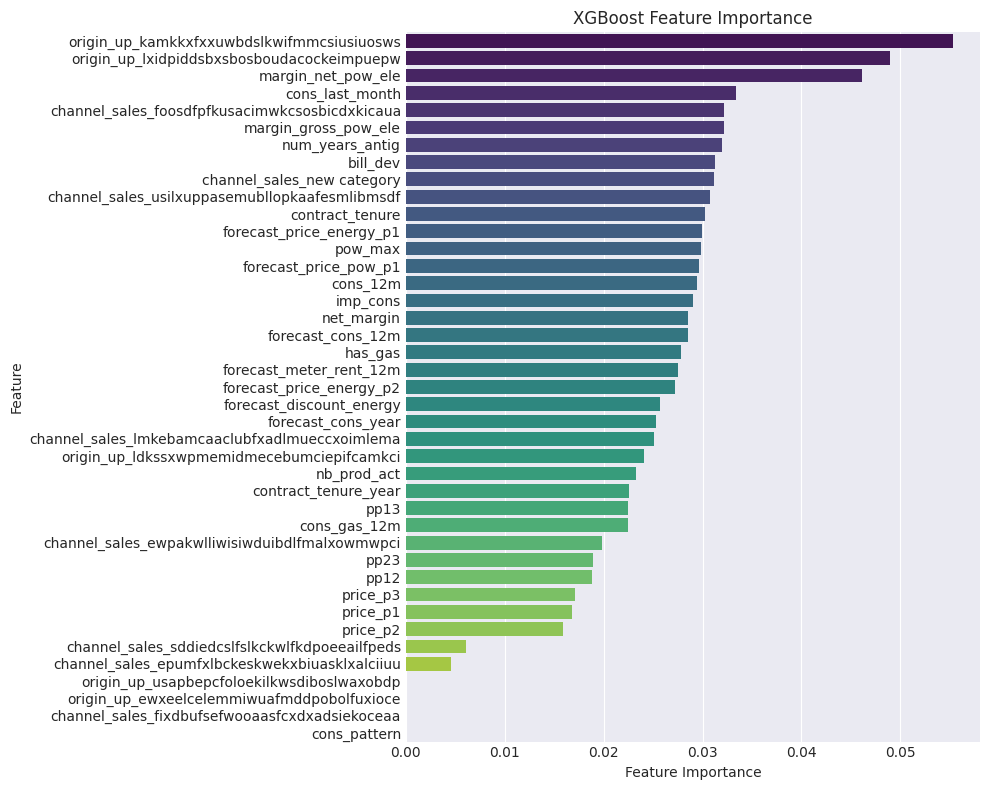

In [26]:
importances = model.feature_importances_

xg_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# 중요도 내림차순 정렬
xg_df_sorted = xg_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    data=xg_df_sorted,
    y='feature', 
    x='importance',
    palette='viridis'
)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

# <span style="color:#ffffff; font-size: 1%;">[5] 💡성능 개선</span>
### <span style="color:#ffffff; font-size: 1%;">성능 개선</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[5] 📈💡성능 개선</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://www.juniper.net/content/dam/www/assets/images/us/en/customers/case-studies/logos/2022/powerco-logo-2.png/jcr:content/renditions/cq5dam.web.1280.1280.png'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>

In [27]:
# !pip install pycaret

# from pycaret.classification import setup, compare_models, pull


# setup(data=df, target='churn', session_id=42, fix_imbalance=True)
# compare_models()
# results = pull()  # 결과표 DataFrame
# print(results[['Model', 'Recall']].sort_values('Recall', ascending=False))

| 항목 번호 | 설명                          | 값                |
| ----- | --------------------------- | ---------------- |
| 0     | Session id                  | 42               |
| 1     | Target                      | churn            |
| 2     | Target type                 | Binary           |
| 3     | Original data shape         | (193002, 42)     |
| 4     | Transformed data shape      | (301351, 42)     |
| 5     | Transformed train set shape | (243450, 42)     |
| 6     | Transformed test set shape  | (57901, 42)      |
| 7     | Numeric features            | 28               |
| 8     | Preprocess                  | True             |
| 9     | Imputation type             | simple           |
| 10    | Numeric imputation          | mean             |
| 11    | Categorical imputation      | mode             |
| 12    | Fix imbalance               | **True**             |
| 13    | Fix imbalance method        | **SMOTE**            |
| 14    | Fold Generator              | StratifiedKFold  |
| 15    | Fold Number                 | 10               |
| 16    | CPU Jobs                    | -1               |
| 17    | Use GPU                     | False            |
| 18    | Log Experiment              | False            |
| 19    | Experiment Name             | clf-default-name |
| 20    | USI                         | 174f             |


| 코드    | 모델 이름                           | Accuracy | AUC    | Recall | Precision | F1 Score | Kappa  | MCC    | 학습 시간 (초) |
| ----- | ------------------------------- | -------- | ------ | ------ | --------- | -------- | ------ | ------ | --------- |
| knn   | **K Neighbors Classifier**          | **0.9996**   | 1.0000 | **0.9998** | **0.9964**    | 0.9981   | 0.9979 | 0.9979 | 20.0270   |
| et    | Extra Trees Classifier          | 0.9990   | 1.0000 | 0.9899 | 0.9996    | 0.9947   | 0.9942 | 0.9942 | 17.6180   |
| rf    | Random Forest Classifier        | 0.9981   | 1.0000 | 0.9812 | 0.9998    | 0.9904   | 0.9893 | 0.9894 | 23.5800   |
| dt    | Decision Tree Classifier        | 0.9970   | 0.9917 | 0.9850 | 0.9842    | 0.9846   | 0.9829 | 0.9829 | 3.2860    |
| dummy | Dummy Classifier                | 0.9010   | 0.5000 | 0.0000 | 0.0000    | 0.0000   | 0.0000 | 0.0000 | 0.9920    |
| lgbm  | Light Gradient Boosting Machine | 0.8835   | 0.9086 | 0.6936 | 0.4434    | 0.5410   | 0.4779 | 0.4936 | 2.6930    |
| gbc   | Gradient Boosting Classifier    | 0.7515   | 0.7452 | 0.5752 | 0.2163    | 0.3144   | 0.1991 | 0.2347 | 41.4890   |
| ada   | Ada Boost Classifier            | 0.6684   | 0.6825 | 0.5840 | 0.1661    | 0.2585   | 0.1234 | 0.1641 | 10.1330   |


In [28]:
# # Recall 기준 정렬 (상위 10개)
# top_models = results[['Model', 'Recall']].sort_values(by='Recall', ascending=False).head(10)


# plt.figure(figsize=(10, 6))
# sns.barplot(data=top_models, x='Recall', y='Model', palette='Blues_d')
# plt.title('Top 10 model Recall compare')
# plt.xlabel('Recall Score')
# plt.ylabel('Model')
# plt.grid(axis='x', linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

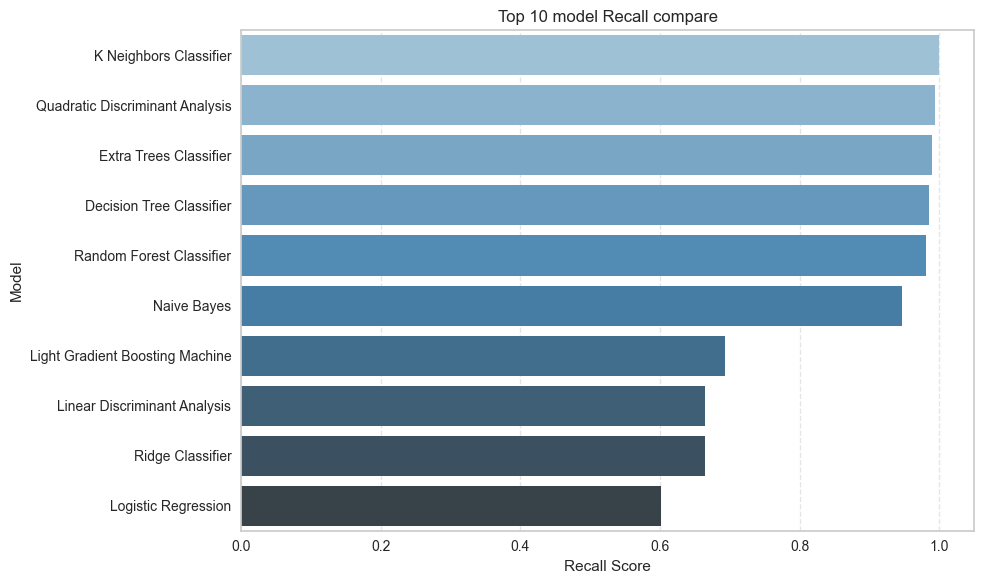
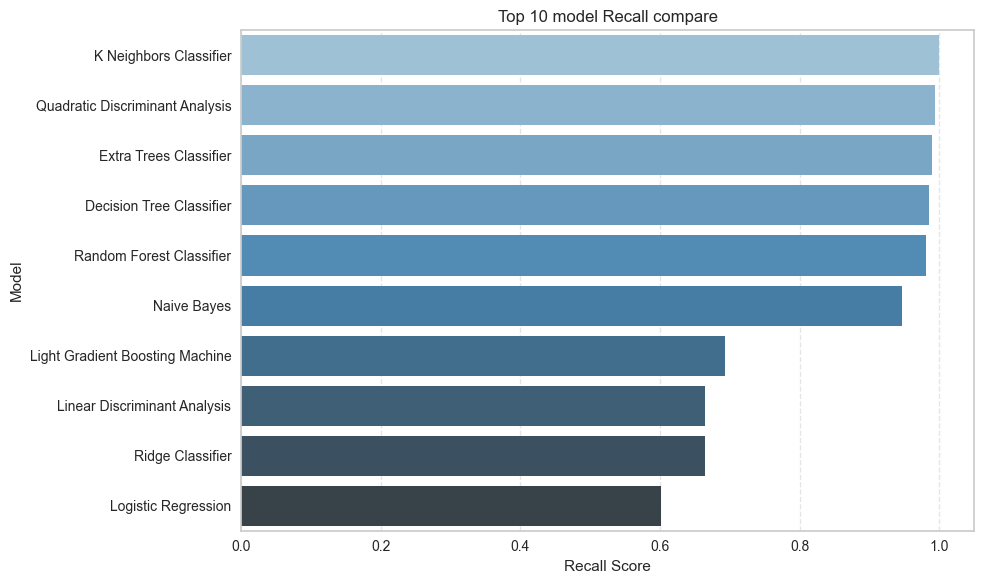
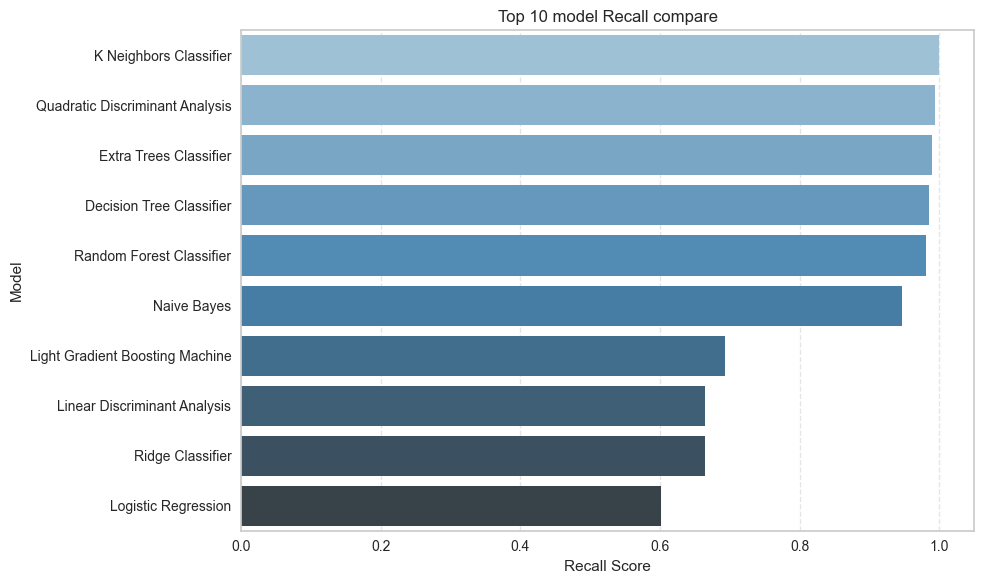
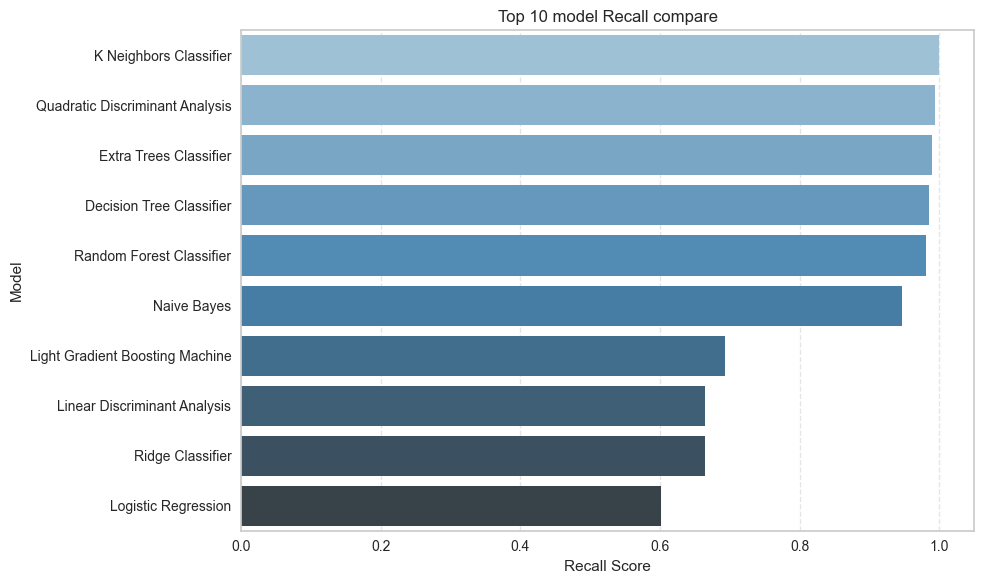
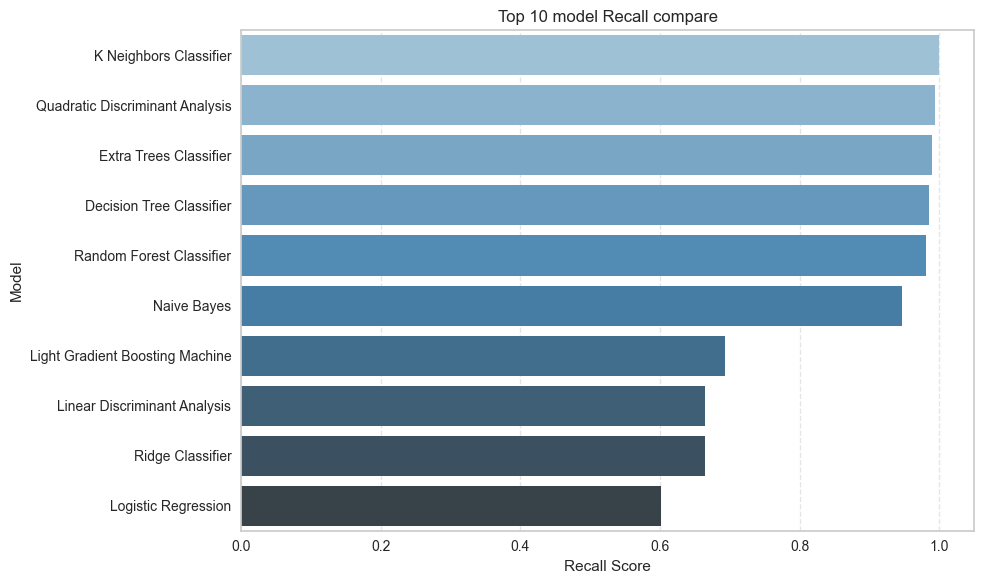
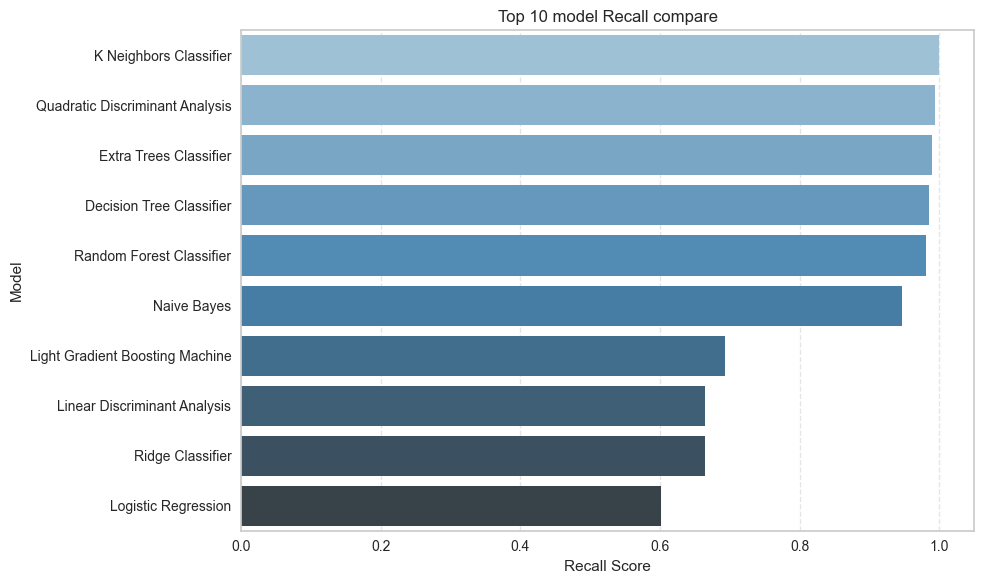

In [29]:
# # 필요한 지표만 추출
# selected_metrics = results[['Model', 'Accuracy', 'Recall', 'Prec.']].copy()
# selected_metrics.rename(columns={'Prec.': 'Precision'}, inplace=True)

# # Recall 기준 정렬
# selected_metrics = selected_metrics.sort_values('Recall', ascending=False)

# # 시각화를 위한 long-format 변환
# plot_df = selected_metrics.melt(id_vars='Model',
#                                 value_vars=['Accuracy', 'Recall', 'Precision'],
#                                 var_name='Metric',
#                                 value_name='Score')

# # Recall 강조해서 그래프 그리기
# plt.figure(figsize=(14, 6))

# Accuracy
# sns.lineplot(data=plot_df[plot_df['Metric'] == 'Accuracy'],
#              x='Model', y='Score', label='Accuracy', marker='o', color='blue')

# Precision
# sns.lineplot(data=plot_df[plot_df['Metric'] == 'Precision'],
#              x='Model', y='Score', label='Precision', marker='o', color='green')

# Recall
# recall_data = plot_df[plot_df['Metric'] == 'Recall']
# sns.lineplot(data=recall_data, x='Model', y='Score',
#              label='Recall', color='crimson', marker='o', linewidth=3)


# # Recall 수치 표시
# for i, row in recall_data.iterrows():
#     plt.text(x=row['Model'], y=row['Score'] + 0.015,
#              s=f"{row['Score']:.2f}", ha='center', color='crimson', fontweight='bold')

# # 그래프 세팅
# plt.xticks(rotation=45)
# plt.ylim(0, 1.1)
# plt.title('Model Performance: Recall Emphasized')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

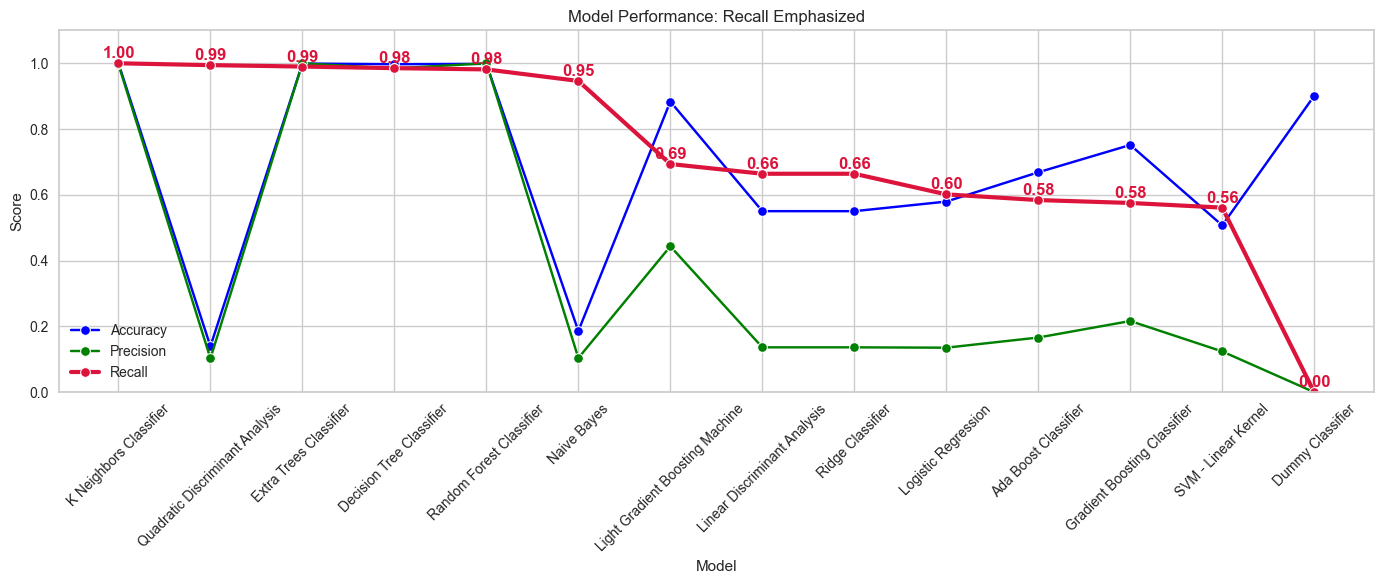
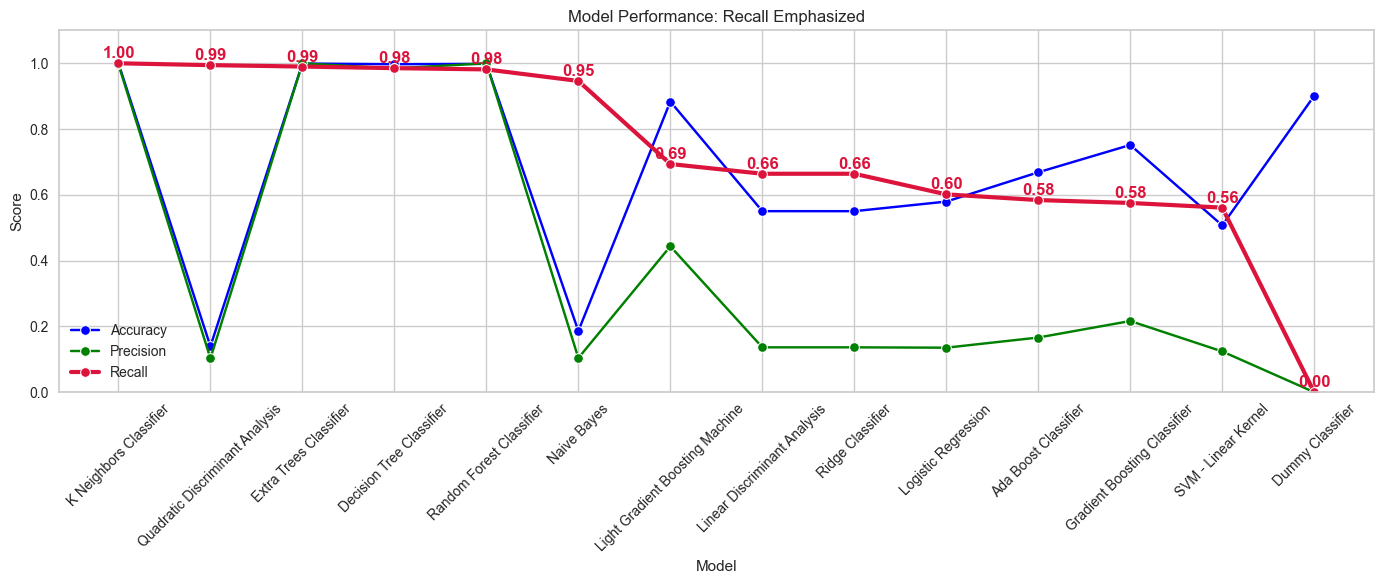

# <span style="color:#ffffff; font-size: 1%;">[6] 💡인사이트 도출</span>
### <span style="color:#ffffff; font-size: 1%;">인사이트 도출</span>

<div style=" border-bottom: 8px solid #FFD700; overflow: hidden; border-radius: 10px; height: 45px; width: 100%; display: flex;">
  <div style="height: 100%; width: 65%; background-color: #7851A9; float: left; text-align: center; display: flex; justify-content: center; align-items: center; font-size: 25px; ">
    <b><span style="color: #FFFFFF; padding: 20px 20px;">[6] 📈💡인사이트 도출</span></b>
  </div>
  <div style="height: 100%; width: 35%; background-image: url('https://www.juniper.net/content/dam/www/assets/images/us/en/customers/case-studies/logos/2022/powerco-logo-2.png/jcr:content/renditions/cq5dam.web.1280.1280.png'); background-size: cover; background-position: center; float: left; border-top-right-radius: 10px; border-bottom-right-radius: 4px;">
  </div>
</div>